In [20]:
# sp.integrate(calc_integrand_1(2), (t, 1 / 2, x))

In [2]:




# def g_opt_inf(x):
#     return 3.0 * x**4 - 8.0 * x**3 + 6.0 * x**2


# # Generate random configurations
# scoring_rules = {
#     "logarithmic": logarithmic_scoring_rule,
#     "spherical": spherical_scoring_rule,
#     "quadratic": quadratic_scoring_rule,
#     "optimal": g_opt_inf,
#     # "g_opt_1": g_opt_1_poly,
#     # "g_opt_2": g_opt_2_poly,
# }

In [ ]:
min_c_list = np.geomspace(1e-10, 1e-5, 100)
min_c_list

In [15]:

# def normalized_scoring_rule(p):
#     return unnormalized_scoring_rule(p) / integrate.quad(unnormalized_scoring_rule, 0, 1)[0]

import numpy as np
import scipy.integrate as spi
from src.utils import *
import matplotlib.pyplot as plt

from dataclasses import dataclass, asdict
from typing import Callable

def run_config(config):
    error, flips, cost = simulate_expert_flips_geometric_cost(
        true_bias=config.true_bias,
        scoring_rule_name=config.scoring_rule,
        base_cost=config.base_cost,
        alpha=config.alpha,
        ell=config.ell,
        start_decay_flips=config.start_decay_flips,
    )
    config = asdict(config)
    config['error'] = error
    config['flips'] = flips
    config["total_cost"] = cost
    return config

np.random.seed(42)  # For reproducibility

@dataclass
class Config:
    true_bias: float
    scoring_rule: str
    base_cost: float
    alpha: float
    # num_trials: int
    ell: float
    # seed: int
    start_decay_flips: int
    min_c: float


configs = []
results = []
from tqdm.auto import tqdm
costs = np.geomspace(0.00003, 100, 5)

# N = 10
# true_bias_list = list(0.5+np.linspace(0, 0.5, N//2))
# true_bias_list.extend(list(0.5-np.linspace(0, 0.5, N//2)))
# true_bias_list = np.array(sorted(list(set(true_bias_list))))[1:-1]
# len(true_bias_list)
true_bias_list = [0.5, 0.5 -0.01, 0.5 +0.01]
min_c_list = np.geomspace(1e-9, 1e-5, 5)
start_decay_flips_list = [3]

# true_bias_list = np.linspace(0.01, 0.99, 30)
alphas = [0.99, 1, 1.01]
for config_idx in tqdm(range(200000*3)):  # Generate 5 random configurations
    # rule_name = np.random.choice(list(scoring_rules.keys()))
    rule_name = "optimal"
    cost = costs[np.random.randint(0, len(costs))]
    alpha = alphas[np.random.randint(0, len(alphas))]
    true_bias = true_bias_list[np.random.randint(0, len(true_bias_list))]

    config = Config(
        # true_bias=0.5 + 0.01 * np.random.uniform(-0.5, 0.5),
        # true_bias=np.random.uniform(0.5, 0.5),
        true_bias=true_bias,
        base_cost=cost,
        scoring_rule=rule_name,
        alpha=alpha,  # Random alpha between 0.8 and 1.2
        ell=20,  # Random ell between 1.5 and 3.0
        start_decay_flips=start_decay_flips_list[np.random.randint(0, len(start_decay_flips_list))],
        min_c=min_c_list[np.random.randint(0, len(min_c_list))],
    )
    configs.append(config)
    

    
len(configs)

  0%|          | 0/600000 [00:00<?, ?it/s]

600000

In [16]:
from multiprocessing import Pool


with Pool() as pool:
    results = list(tqdm(pool.imap(run_config, configs), total=len(configs)))
df = pd.DataFrame(results)

# for config in tqdm(configs):

  0%|          | 0/600000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [6]:
df.to_csv('simulation_results.csv', index=False)

,true_bias,scoring_rule,base_cost,alpha,ell,start_decay_flips,min_c,error,flips,total_cost
0,0.875,optimal,0.013161,0.999,20,50.50,1.000000e-05,8.673617e-19,2,0.026321
1,0.250,optimal,0.100000,1.001,20,50.50,3.162278e-08,9.094947e-13,0,0.000000
2,0.500,optimal,0.001732,0.999,20,50.50,1.000000e-05,1.749678e-19,11,0.019053
3,0.750,optimal,0.000228,1.000,20,25.75,5.623413e-07,7.888609e-31,30,0.006839
4,0.500,optimal,0.100000,0.999,20,25.75,1.000000e-05,0.000000e+00,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
599995,0.750,optimal,0.100000,1.001,20,50.50,1.778279e-09,9.094947e-13,0,0.000000
599996,0.875,optimal,0.001732,0.999,20,25.75,1.000000e-05,1.715557e-15,11,0.019053
599997,0.750,optimal,0.100000,1.000,20,100.00,5.623413e-07,9.094947e-13,0,0.000000
599998,0.125,optimal,0.100000,1.001,20,50.50,1.000000e-05,3.024303e-09,0,0.000000


In [ ]:
plt.figure(figsize=(10, 6))
for alpha in alphas:
    query = f"alpha=={alpha} and scoring_rule=='optimal'"
    q_result = df.query(query)
    plt.scatter(q_result['true_bias'], q_result['flips'], 
               alpha=0.1, label=f'α={alpha}')

plt.xlabel('True Bias')
plt.ylabel('Number of Flips')
plt.title('Flips vs True Bias for Different α Values')
plt.legend()
plt.grid(True)


/tmp/ipykernel_722728/2015531599.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/tmp/ipykernel_722728/2015531599.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/tmp/ipykernel_722728/2015531599.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Ei

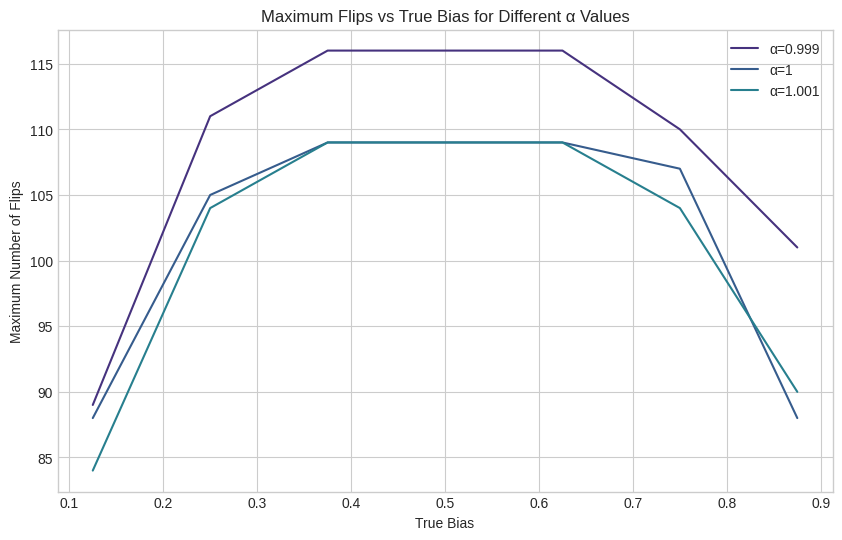

In [4]:
ser_list = []
for alpha in alphas:
    query = f"alpha=={alpha} and scoring_rule=='optimal'"
    q_result = df.query(query)
    q_result_max = q_result.groupby("true_bias").apply(lambda x: x["flips"].max())
    ser_list.append((str(alpha), q_result_max))
    
plt.figure(figsize=(10, 6))
for name, series in ser_list:
    plt.plot(series.index, series.values, label=f'α={name}')
plt.xlabel('True Bias')
plt.ylabel('Maximum Number of Flips') 
plt.title('Maximum Flips vs True Bias for Different α Values')
plt.legend()
plt.grid(True)


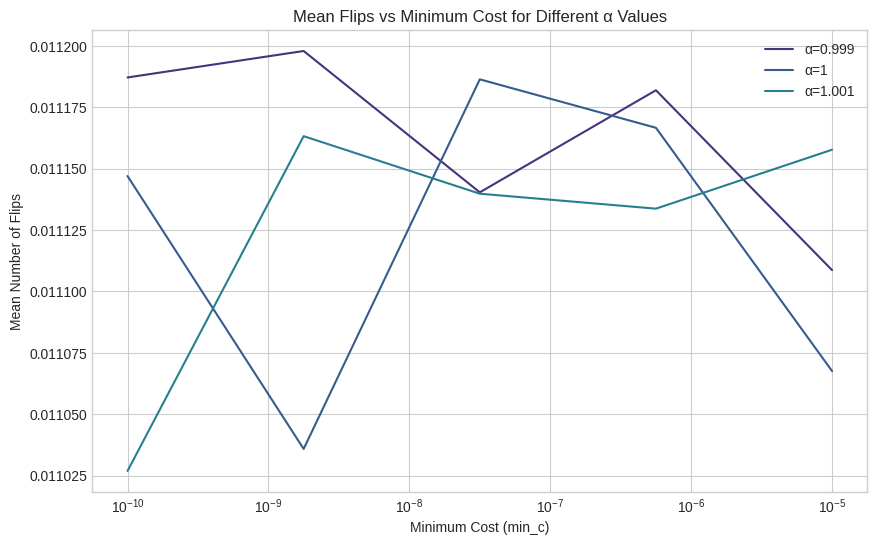

In [10]:
plt.figure(figsize=(10, 6))
for alpha in alphas:
    query = f"alpha=={alpha} and scoring_rule=='optimal'"
    q_result = df.query(query)
    mean_flips = q_result.groupby('min_c')['total_cost'].mean()
    plt.plot(mean_flips.index, mean_flips.values, label=f'α={alpha}')

plt.xscale('log')  # Since min_c values span many orders of magnitude
plt.xlabel('Minimum Cost (min_c)')
plt.ylabel('Mean Number of Flips')
plt.title('Mean Flips vs Minimum Cost for Different α Values')
plt.legend()
plt.grid(True)


/tmp/ipykernel_722728/2344412401.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/tmp/ipykernel_722728/2344412401.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/tmp/ipykernel_722728/2344412401.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Ei

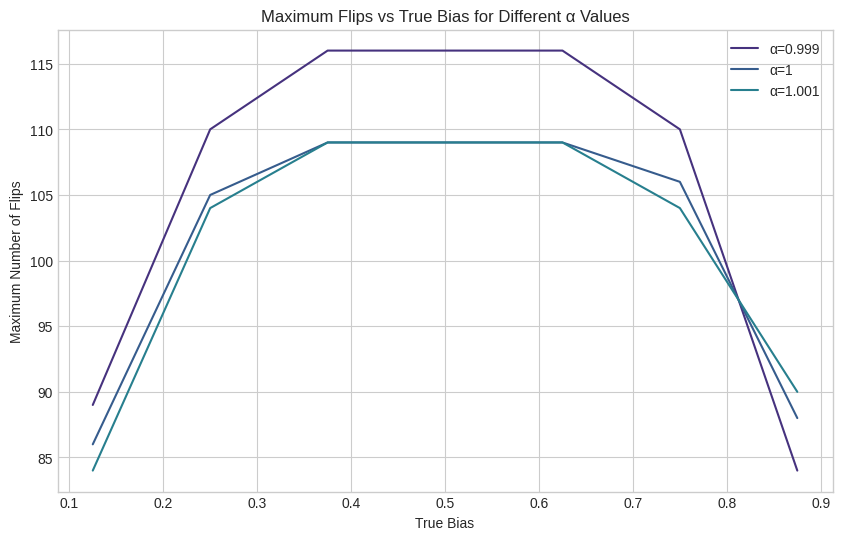

In [5]:
ser_list = []
for alpha in alphas:
    query = f"alpha=={alpha} and scoring_rule=='optimal'"
    q_result = df.query(query)
    q_result_max = q_result.groupby("true_bias").apply(lambda x: x["flips"].max())
    ser_list.append((str(alpha), q_result_max))
    
plt.figure(figsize=(10, 6))
for name, series in ser_list:
    plt.plot(series.index, series.values, label=f'α={name}')
plt.xlabel('True Bias')
plt.ylabel('Maximum Number of Flips') 
plt.title('Maximum Flips vs True Bias for Different α Values')
plt.legend()
plt.grid(True)


In [ ]:
ser_list = []
for alpha in alphas:
    query = f"alpha=={alpha} and scoring_rule=='optimal'"
    q_result = df.query(query)
    q_result_max = q_result.groupby("true_bias").apply(lambda x: x["flips"].max())
    ser_list.append((str(alpha), q_result_max))
    
plt.figure(figsize=(10, 6))
for name, series in ser_list:
    plt.plot(series.index, series.values, label=f'α={name}')
plt.xlabel('True Bias')
plt.ylabel('Maximum Number of Flips') 
plt.title('Maximum Flips vs True Bias for Different α Values')
plt.legend()
plt.grid(True)


In [ ]:
alpha1.hist("flips")

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def determine_y_limits(df, y_func, y_min=None, y_max=None):
    if y_min is None:
        y_min = float('inf')
    if y_max is None:
        y_max = float('-inf')
    y_min = min(y_min, y_func(df).min())
    y_max = max(y_max, y_func(df).max())
    return y_min, y_max
        
def create_plot_type(df):
    plot_type = [
                ("true_bias", lambda x: x["flips"], "Flips"),
                # ("flips", lambda x: x["base_cost"] * x["flips"], "Cost"),
                ("flips", lambda x: x["total_cost"], "Cost"),

                ]
    fig, axes = plt.subplots(len(plot_type), len(scoring_rules), figsize=(5 * len(scoring_rules), len(plot_type) * 5))

    axes = axes.reshape(len(plot_type), len(scoring_rules))
    fig.suptitle("Number of Flips vs True Bias by Scoring Rule", fontsize=14, y=1.02)

    scoring_ordering = list(scoring_rules.keys())
    df_by_rule = {rule:data for rule, data in df.groupby("scoring_rule")}

    for row, (x_col, y_func, y_label) in enumerate(plot_type):
        y_min, y_max = determine_y_limits(df, y_func)
            
        for i, rule in enumerate(scoring_ordering):
            filtered_data = df_by_rule[rule]
            plt.sca(axes[row,i])
            plt.hist2d(filtered_data[x_col], y_func(filtered_data), bins=50, norm=plt.matplotlib.colors.LogNorm())
            plt.colorbar(label="Count")
            plt.xlabel(x_col)
            plt.ylabel(y_label)
            plt.title(f"{rule}  flips)")
            plt.ylim(y_min, y_max)
            

    plt.tight_layout()
create_plot_type(df[df.alpha==1])
create_plot_type(df[df.alpha>1])

In [ ]:
create_plot_type(df[df.alpha<1])

In [ ]:
thresholds = [(">30", lambda x: True)]
fig, axes = plt.subplots(len(thresholds), len(scoring_rules), figsize=(5 * len(scoring_rules), len(thresholds) * 5))
fig.suptitle("Number of Flips vs Cost by Scoring Rule", fontsize=14, y=1.02)

# Calculate y-axis limits for each row
for row, (threshold_label, threshold_fn) in enumerate(thresholds):
    y_min = float('inf')
    y_max = float('-inf')
    for rule, data in df.groupby("scoring_rule"):
        filtered_data = data
        costs = filtered_data.base_cost * filtered_data.flips
        y_min = min(y_min, costs.min())
        y_max = max(y_max, costs.max())
        
    for i, (rule, data) in enumerate(df.groupby("scoring_rule")):
        filtered_data = data
        plt.sca(axes[i])
        plt.hist2d(filtered_data.flips, filtered_data.base_cost * filtered_data.flips, bins=50, norm=plt.matplotlib.colors.LogNorm())
        plt.colorbar(label="Count")
        plt.xlabel("Number of Flips")
        plt.ylabel("Total Cost")
        plt.title(f"{rule} Scoring Rule\n({threshold_label} flips)")
        plt.ylim(y_min, y_max)

plt.tight_layout()

In [ ]:
df.flips

In [ ]:



fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Flip Count Distribution by Scoring Rule")

for i, (rule, data) in enumerate(df.groupby("scoring_rule")):
    sns.histplot(data=data, x="flips", ax=axes[i])
    
    axes[i].set_title(f"{rule} Scoring Rule")
    axes[i].set_xlabel("Number of Flips")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(results)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Alpha vs Error Distribution by Scoring Rule')

for i, (rule, data) in enumerate(df.groupby('scoring_rule')):
    sns.histplot(
        data=data,
        x='alpha',
        y='error',
        bins=20,
        ax=axes[i],
        cmap='viridis'
    )
    axes[i].set_title(f'{rule} Scoring Rule')
    axes[i].set_xlabel('Alpha')
    axes[i].set_ylabel('Error')

plt.tight_layout()
plt.show()

In [ ]:

def run_simulations(scoring_rule, base_cost=0.01, num_trials=1000, ell=2.0, seed=42):
    """Run simulations with constant, decreasing, and increasing cost structures."""
    # Constant cost (α=1)
    const_error, const_flips, const_errors, const_flip_counts = (
        simulate_expert_flips_geometric_cost(
            scoring_rule,
            base_cost,
            alpha=1.0,
            num_trials=num_trials,
            ell=ell,
            seed=seed,
        )
    )

    # Decreasing cost (α=0.9)
    dec_error, dec_flips, dec_errors, dec_flip_counts = (
        simulate_expert_flips_geometric_cost(
            scoring_rule,
            base_cost,
            alpha=0.9,
            num_trials=num_trials,
            ell=ell,
            seed=seed,
        )
    )

    # Increasing cost (α=1.1)
    inc_error, inc_flips, inc_errors, inc_flip_counts = (
        simulate_expert_flips_geometric_cost(
            scoring_rule,
            base_cost,
            alpha=1.1,
            num_trials=num_trials,
            ell=ell,
            seed=seed,
        )
    )

    return {
        "Constant": (const_error, const_flips, const_errors, const_flip_counts),
        "Decreasing": (dec_error, dec_flips, dec_errors, dec_flip_counts),
        "Increasing": (inc_error, inc_flips, inc_errors, inc_flip_counts),
    }


def plot_comparison_results(results, scoring_rule_name):
    """Create bar plots comparing the three cost structures."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Extract data
    cost_structures = list(results.keys())
    errors = [results[cs][0] for cs in cost_structures]
    flips = [results[cs][1] for cs in cost_structures]

    # Error plot
    bars1 = ax1.bar(cost_structures, errors, width=0.6)
    ax1.set_ylabel("Mean Error", fontsize=12)
    ax1.set_title(
        f"Mean Error by Cost Structure\n({scoring_rule_name} Scoring Rule)", fontsize=14
    )
    ax1.set_ylim(0, max(errors) * 1.2)

    # Add value labels on bars
    for bar in bars1:
        height = bar.get_height()
        ax1.text(
            bar.get_x() + bar.get_width() / 2.0,
            height + 0.0001,
            f"{height:.4f}",
            ha="center",
            va="bottom",
            fontsize=10,
        )

    # Flips plot
    bars2 = ax2.bar(cost_structures, flips, width=0.6)
    ax2.set_ylabel("Average Number of Flips", fontsize=12)
    ax2.set_title(
        f"Average Flips by Cost Structure\n({scoring_rule_name} Scoring Rule)",
        fontsize=14,
    )
    ax2.set_ylim(0, max(flips) * 1.2)

    # Add value labels on bars
    for bar in bars2:
        height = bar.get_height()
        ax2.text(
            bar.get_x() + bar.get_width() / 2.0,
            height + 0.1,
            f"{height:.2f}",
            ha="center",
            va="bottom",
            fontsize=10,
        )

    plt.tight_layout()
    return fig


def plot_distribution_comparison(results, scoring_rule_name):
    """Create violin plots showing the distribution of errors and flips."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Extract data for violin plots
    cost_structures = list(results.keys())
    error_data = [results[cs][2] for cs in cost_structures]
    flips_data = [results[cs][3] for cs in cost_structures]

    # Error distribution plot
    ax1.violinplot(error_data, showmeans=True)
    ax1.set_xticks(range(1, len(cost_structures) + 1))
    ax1.set_xticklabels(cost_structures)
    ax1.set_ylabel("Error Distribution", fontsize=12)
    ax1.set_title(
        f"Error Distribution by Cost Structure\n({scoring_rule_name} Scoring Rule)",
        fontsize=14,
    )

    # Flips distribution plot
    ax2.violinplot(flips_data, showmeans=True)
    ax2.set_xticks(range(1, len(cost_structures) + 1))
    ax2.set_xticklabels(cost_structures)
    ax2.set_ylabel("Number of Flips Distribution", fontsize=12)
    ax2.set_title(
        f"Flip Count Distribution by Cost Structure\n({scoring_rule_name} Scoring Rule)",
        fontsize=14,
    )

    plt.tight_layout()
    return fig



In [ ]:


def plot_alpha_sweep(results, scoring_rule_name):
    """Plot error and flips as a function of alpha."""
    alphas = sorted(results.keys())
    errors = [results[a][0] for a in alphas]
    flips = [results[a][1] for a in alphas]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Mark the constant cost case (α=1)
    const_idx = alphas.index(1.0)

    # Error plot
    ax1.plot(alphas, errors, marker="o", linewidth=2)
    ax1.axvline(
        x=1.0, color="red", linestyle="--", alpha=0.7, label="Constant Cost (α=1)"
    )
    ax1.scatter([1.0], [errors[const_idx]], color="red", s=100, zorder=5)
    ax1.set_xlabel("Alpha (α)", fontsize=12)
    ax1.set_ylabel("Mean Error", fontsize=12)
    ax1.set_title(
        f"Mean Error vs. Alpha\n({scoring_rule_name} Scoring Rule)", fontsize=14
    )
    ax1.grid(True)
    ax1.legend()

    # Annotate regions
    ax1.text(
        alphas[0],
        max(errors),
        "Decreasing Cost",
        color="blue",
        fontsize=12,
        ha="left",
        va="top",
    )
    ax1.text(
        alphas[-1],
        max(errors),
        "Increasing Cost",
        color="blue",
        fontsize=12,
        ha="right",
        va="top",
    )

    # Flips plot
    ax2.plot(alphas, flips, marker="o", linewidth=2)
    ax2.axvline(
        x=1.0, color="red", linestyle="--", alpha=0.7, label="Constant Cost (α=1)"
    )
    ax2.scatter([1.0], [flips[const_idx]], color="red", s=100, zorder=5)
    ax2.set_xlabel("Alpha (α)", fontsize=12)
    ax2.set_ylabel("Average Number of Flips", fontsize=12)
    ax2.set_title(
        f"Average Flips vs. Alpha\n({scoring_rule_name} Scoring Rule)", fontsize=14
    )
    ax2.grid(True)
    ax2.legend()

    # Annotate regions
    ax2.text(
        alphas[0],
        max(flips),
        "Decreasing Cost",
        color="blue",
        fontsize=12,
        ha="left",
        va="top",
    )
    ax2.text(
        alphas[-1],
        max(flips),
        "Increasing Cost",
        color="blue",
        fontsize=12,
        ha="right",
        va="top",
    )

    plt.tight_layout()
    return fig


# Run the main simulation comparing cost structures
def main():
    # Set parameters
    base_cost = 0.1
    num_trials = 2000
    ell = 2.0
    seed = 42

    # Run simulations for different scoring rules
    print("Running simulations for Quadratic scoring rule...")
    quadratic_results = run_simulations(
        quadratic_scoring_rule, base_cost, num_trials, ell, seed
    )

    print("Running simulations for Logarithmic scoring rule...")
    log_results = run_simulations(
        logarithmic_scoring_rule, base_cost, num_trials, ell, seed
    )

    print("Running simulations for Spherical scoring rule...")
    spherical_results = run_simulations(
        spherical_scoring_rule, base_cost, num_trials, ell, seed
    )

    # Create comparison plots
    print("Creating comparison plots...")
    plot_comparison_results(quadratic_results, "Quadratic")
    plot_distribution_comparison(quadratic_results, "Quadratic")

    plot_comparison_results(log_results, "Logarithmic")
    plot_distribution_comparison(log_results, "Logarithmic")

    plot_comparison_results(spherical_results, "Spherical")
    plot_distribution_comparison(spherical_results, "Spherical")

    # Run alpha sweep for more detailed analysis
    print("Running alpha sweep analysis...")
    alphas = [0.7, 0.8, 0.9, 0.95, 1.0, 1.05, 1.1, 1.2, 1.3]

    quadratic_alpha_results = run_alpha_sweep(
        quadratic_scoring_rule, alphas, base_cost, num_trials, ell, seed
    )
    plot_alpha_sweep(quadratic_alpha_results, "Quadratic")

    log_alpha_results = run_alpha_sweep(
        logarithmic_scoring_rule, alphas, base_cost, num_trials, ell, seed
    )
    plot_alpha_sweep(log_alpha_results, "Logarithmic")

    spherical_alpha_results = run_alpha_sweep(
        spherical_scoring_rule, alphas, base_cost, num_trials, ell, seed
    )
    plot_alpha_sweep(spherical_alpha_results, "Spherical")

    plt.show()

    # Print detailed results
    print("\nDetailed Results:")
    for rule_name, results in [
        ("Quadratic", quadratic_results),
        ("Logarithmic", log_results),
        ("Spherical", spherical_results),
    ]:
        print(f"\n{rule_name} Scoring Rule:")
        for cost_type, (error, flips, _, _) in results.items():
            print(f"  {cost_type} Cost: Error = {error:.4f}, Avg Flips = {flips:.2f}")


if __name__ == "__main__":
    main()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

In [4]:
# Define some common scoring rules
def log_score(p: float) -> float:
    return np.log(p)


def quadratic_scoring_rule(p: float) -> float:
    """Quadratic scoring rule: 2p - (p^2 + (1-p)^2)"""
    return 2 * p - (p**2 + (1 - p) ** 2)


def logarithmic_scoring_rule(p: float) -> float:
    """Logarithmic scoring rule: ln(p)"""
    return np.log(p)


def spherical_scoring_rule(p: float) -> float:
    """Spherical scoring rule: p/sqrt(p^2 + (1-p)^2)"""
    return p / np.sqrt(p**2 + (1 - p) ** 2)


def optimal_scoring_rule(p: float, ell: float = 2.0) -> float:
    """
    Optimal scoring rule g_{ell,Opt} from the paper.
    Default ell=2 minimizes expected squared error.
    """
    if p <= 0.5:
        return -(((1 - p) / p) ** (1 / ell))
    return -((p / (1 - p)) ** (1 / ell))


def reward(
    scoring_rule: Callable[[float], float], true_bias: float, curr_pred: float
) -> float:
    return true_bias * scoring_rule(curr_pred) + (1 - true_bias) * scoring_rule(
        1 - curr_pred
    )

In [ ]:
def simulate_expert_flips(
    scoring_rule: Callable[[float], float],
    cost_per_flip: float,
    num_trials: int = 1000,
    ell: float = 2.0,
) -> float:
    """
    Simulates expert behavior optimizing for ell-th moment of error.

    Args:
        scoring_rule: Function that takes prediction p and returns score
        cost_per_flip: Cost c per coin flip
        num_trials: Number of simulation trials
        ell: Power of error moment to optimize

    Returns:
        Average ell-th power of absolute error across trials
    """
    errors = []

    for _ in range(num_trials):
        true_bias = np.random.random()
        heads = 0
        flips = 0

        while True:
            curr_pred = (heads + 1) / (flips + 2)
            curr_score = reward(scoring_rule, true_bias, curr_pred)

            exp_heads = heads + true_bias
            exp_flips = flips + 1
            next_pred = (exp_heads + 1) / (exp_flips + 2)
            next_score = reward(scoring_rule, true_bias, next_pred)

            if next_score - curr_score < cost_per_flip:
                break

            if np.random.random() < true_bias:
                heads += 1
            flips += 1

        errors.append(abs(curr_pred - true_bias) ** ell)

    return np.mean(errors)


def compare_scoring_rules(
    cost_per_flip: float = 0.01, 
    num_trials: int = 1000,
    ell_values: list = [1.0, 2.0, 4.0],
):
    """
    Compares scoring rules across different ell values.

    Args:
        cost_per_flip: Cost c per coin flip
        num_trials: Number of simulation trials 
        ell_values: List of ell values to test

    Returns:
        Dictionary of results for each scoring rule and ell value
    """
    results = {}

    for ell in ell_values:
        scoring_rules = {
            "Quadratic": quadratic_scoring_rule,
            "Logarithmic": logarithmic_scoring_rule, 
            "Spherical": spherical_scoring_rule,
            f"Optimal (ell={ell})": lambda p: optimal_scoring_rule(p, ell),
        }

        ell_results = {}
        for name, rule in scoring_rules.items():
            error = simulate_expert_flips(rule, cost_per_flip, num_trials, ell)
            ell_results[name] = error

        results[f"ell={ell}"] = ell_results

    return results


def plot_comparison(costs: list, ell: float = 2.0, num_trials: int = 1000):
    """
    Plots error vs cost for different scoring rules.
    
    Args:
        costs: List of cost values to test
        ell: Power of error moment to optimize
        num_trials: Number of simulation trials
    """
    results = []
    for c in costs:
        result = compare_scoring_rules(c, num_trials=num_trials, ell_values=[ell])
        results.append(result[f"ell={ell}"])

    plt.figure(figsize=(10,6))
    for rule in results[0].keys():
        errors = [r[rule] for r in results]
        plt.plot(costs, errors, marker='o', label=rule)

    plt.xscale('log')
    plt.yscale('log') 
    plt.xlabel('Cost per flip')
    plt.ylabel(f'Average {ell}-th power of absolute error')
    plt.title(f'Scoring Rule Performance (ell={ell})')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    return plt

plot_comparison([0.1])

In [ ]:

def plot_data(df):
    thresholds = [(">30", lambda x: x > 30), ("<30", lambda x: x < 30)]
    rows = len(thresholds)
    cols = len(scoring_rules)
    
    # Create figure and axes grid
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 6*rows))
    
    # Create color map for scoring rules
    colors = plt.cm.tab10(np.linspace(0, 1, len(scoring_rules)))
    color_map = dict(zip(scoring_rules.keys(), colors))
    
    for row, (threshold_label, threshold_fn) in enumerate(thresholds):
        # Calculate global min/max error for consistent y-axis
        all_errors = []
        for rule, data in df.groupby("scoring_rule"):
            filtered_data = data[threshold_fn(data.flips)]
            if not filtered_data.empty:
                all_errors.extend(filtered_data.error.tolist())
                
        y_min = min(all_errors) if all_errors else 0
        y_max = max(all_errors) if all_errors else 1
        y_range = [y_min * 0.95, y_max * 1.05]
        
        for col, (rule, data) in enumerate(df.groupby("scoring_rule")):
            ax = axes[row, col]
            filtered_data = data[threshold_fn(data.flips)]
            
            # Plot scatter
            ax.scatter(
                filtered_data.flips,
                filtered_data.error,
                color=color_map[rule],
                alpha=0.7,
                s=40,
                edgecolor='white',
                linewidth=0.5
            )
            
            # Configure axes
            ax.set_xlabel("Number of Flips")
            ax.set_ylabel("Error")
            ax.set_ylim(y_range)
            ax.grid(True, alpha=0.3)
            
            # Set title
            ax.set_title(f"{rule} ({threshold_label} flips)")
            
            # Style improvements
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            
    plt.suptitle("Error vs Number of Flips by Scoring Rule", y=1.02)
    plt.tight_layout()
    plt.show()